#  The Sparks Foundation
#### Data Science and Business Analytics (GRIP JULY'22)

##  Task 1: Prediction using Supervised ML  

### Problem Statement

* Predict the percentage of a student based on the number of study hours.
* What will be the predicted score if a student studies for 9.25 hrs/day?

#### Author: Mukul Mahawar

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

*****

### Importing all libraries required in this notebook

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

####  Dataset needed  : http://bit.ly/w-data

Read the csv dataset as a pandas dataframe.

In [2]:
path = 'http://bit.ly/w-data'
data = pd.read_csv(path)

print('Success')

Success


### Data Understanding

In [3]:
data.head(10)          # Check top 10 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.tail()          # Check last 5 rows

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualize the data

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. 

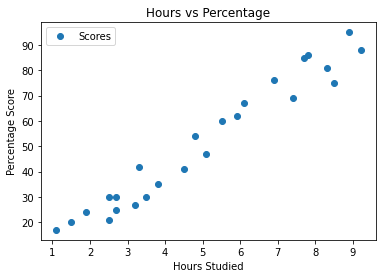

In [7]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [9]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [11]:
y[ :5]

array([21, 47, 27, 75, 30], dtype=int64)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=42)

### **Training the Algorithm**

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


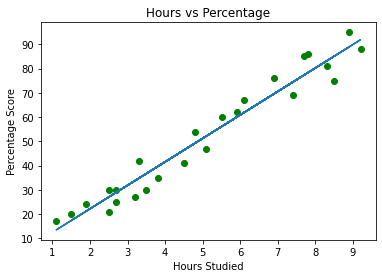

In [14]:
line = regressor.coef_*X+regressor.intercept_             # Plotting the regression line

                                                     
plt.scatter(X, y ,  color='green' )                      # Plotting for the test data
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [15]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Trainning Score')
print(regressor.score(X_train, y_train))

Test Score
0.9678055545167994
Trainning Score
0.9491209376364416


### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [16]:
print(X_test)                                    # Testing data - In Hours
y_pred = regressor.predict(X_train)              # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [17]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

In [18]:
y_pred

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959,
       33.80954245, 46.39624405, 88.99738793, 85.12455667, 36.71416589,
       28.96850337, 21.22284085, 49.3008675 , 61.8875691 , 78.34710196,
       56.0783222 , 77.37889414, 13.47717832, 74.4742707 , 91.90201137])

In [19]:
y_pred[:5]

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959])

In [20]:
s_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred[:5]})        # Comparing Actual vs Predicted
s_data 

,Actual,Predicted
0,81,28.968503
1,30,34.777750
2,21,52.205491
3,76,39.618789
4,62,17.350010


In [21]:
print("The score of student who studied for 9.30 hours a day ",regressor.predict([[9.30]]))

The score of student who studied for 9.30 hours a day  [92.87021919]


### **Model Evaluation Metrics**

In [22]:
print('Mean Squared Error:', 
      mean_squared_error(y_test, y_pred[:5]))

print('Mean Absolute Error:', 
      mean_absolute_error(y_test, y_pred[:5]))

Mean Squared Error: 1404.2200673968694
Mean Absolute Error: 33.80918778157651


****